- In data science, probability helps us measure how uncertain we are about certain events. 

- Imagine rolling a die—this die can land on any number from 1 to 6, which are all the possible outcomes (the universe of events).

- An **Event** is just a specific outcome or group of outcomes we're interested in. For example, an event could be "the die rolls a 1" or "the die rolls an even number."

- When we write 𝑃(𝐸), it means we're talking about the likelihood or probability of that specific event E happening.
  
- So, if you roll the die, 𝑃("rolling a 1") would be 1 out of 6, because there's one chance to roll a 1 out of six possible outcomes.

# Basics of Probability

1. **Sample Space (S)**: The sample space is the **set of all possible outcomes** of a random experiment.
   - For example, when rolling a six-sided die, the sample space is `{1, 2, 3, 4, 5, 6}`.

2. **Event (E)**: An event is a **subset of the Sample Space**. It is a specific outcome or a set of outcomes.
   - For example, in rolling a die, the event of getting an even number is `{2, 4, 6}`.
     
3. **Probability (P)**: Probability is a measure of the **likelihood of an Event occurring**.
   - It is a number between 0 and 1, where 0 represents an impossible event and 1 represents a certain event.
   - The probability of an event E is denoted by P(E).
   - `0≤P(E)≤1`

4. **Complement**: The complement of an event E consists of **all outcomes not in E**.
   - `P(E′)=1−P(E)`

5. **Union and Intersection of Events**:
   - `P(E ∪ F) = P(E) + P(F) - P(E ∩ F)`: Probability of the union of two events.
   - `P(E ∩ F) = P(E) ⋅ P(F)`: Probability of the intersection of two independent events.
     
6. **Multiplication Rule (for Independent Events)**:`P(E ∩ F) = P(E)⋅P(F)`: Probability of the intersection of two independent events.
   
7. **Conditional probability**: `P(E∣F)= P(E∩F)/P(F)`: Conditional probability of E given that F has occurred.


# 1. Dependence and Independence

1. **Independent Event**
    - when occurrence of one does not affect the next/other's occurence
    - Coin Flips:
        - Event A: Getting heads on the first flip.
        - Event B: Getting tails on the second flip.  
        - The outcome of the first flip doesn't affect the outcome of the second flip. The events are independent.
          

    - Dice Rolls:
        - Event A: Rolling a 4 on a six-sided die.
        - Event B: Rolling a 6 on the same die.
        - The outcome of rolling a 4 doesn't affect the outcome of rolling a 6. The events are independent


    - For indepdendent events **multiplication rule** applies
2. **Dependent Event**
   - Two events, A and B, are dependent if the occurrence or non-occurrence of one affects the occurrence of the other. For example:  
   - Drawing Cards:
       - Event A: Drawing an Ace from a deck of cards.
       - Event B: Drawing a King from the same deck without replacing the first card.
       - If you draw an Ace on the first draw, the probability of drawing a King on the second draw changes because there is one less card in the deck. The events are dependent.

    - Marbles in a Bag:
        - Event A: Drawing a red marble from a bag.
        - Event B: Drawing a blue marble from the same bag without replacing the first marble.

# 2. Conditional Probability

- For independent events, we know, `P(E,F) = P(E).P(F)`

- when dependent E event depends on F that has already occurred, then `P(E,F) = P(E|F).P(F)`

- to check E and F events are independent, check `P(E) = P(E|F)`

- Example: A family has two children.Probabilities based on following assumptions:
  1. Each child is equally likely to be a boy or a girl.
  2. The gender of the second child is independent of the gender of the first child.

- Possibilities: BB, BG, GB, GG
- P(no girl) = 1/4
- P(1 G and 1B) = 1/2
- P(GG | elder is G) = 1/2
- P(GG | either is G) = 1/3
- based on last probability, that if either of the child is girl, then the probability that other child will be boy is (2/3).
- Lets check this in a big random sample.

In [50]:
import enum, random

#enum is a typed set of enumerated values, we use it to make code more readable and descriptive

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

GG = 0   # Both girls
GX = 0   # Older girl
GX_or_XG = 0 #Either girl

random.seed(0)

for _ in range(10000):
    #generate random kids couple
    younger = random_kid()
    older = random_kid()
    #Check in 10000 samples how many kid couples have GX(older girls), GG(Both are girls) or GX_or_XG (Either is girl)
    if older == Kid.GIRL:
        GX += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        GG += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        GX_or_XG +=1

assert 0.5 < GG/GX < 0.51
assert 0.33 < GG/GX_or_XG <0.34


#based on these find the probabilities
#1. probabily of second child be girl when older child is girl (P(GG|GX) = P(GG,GX)/P(GX))
print(f"P1 is {GG/GX}") #equals 1/2

#2. probaility of both are girls given either is a girl (P(GG/GX_orXG) = P(GG, GX_or_XG) / P(GX_or_XG))
print(f"P2 is {GG/GX_or_XG}") #equals 1/3



P1 is 0.5007089325501317
P2 is 0.3311897106109325


# 3. Bayes's Theorem

- describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

- Bayes' theorem tells us **how to update our belief in the probability of A given the occurrence of B, by considering the probability of B given A and the prior probability of A.**

- One of the data scientist’s best friends is Bayes’s theorem, which is a way of “reversing” conditional probabilities.
  
- e.g. if we know, conditional probability of B when A has already occurred,
  - `P(B|A) = P(B,A)/P(A)`
  - `P(B,A) = P(B|A).P(A)`
- then we can find the vice-versa condition, i.e. P(A|B), probability of A when B has already occurred  
  - `P(A|B) = P(A,B)/P(B)`
  - `P(A|B) = P(B|A).P(A)/P(B)`
  - `P(B) = P(B,A)+P(B,-A)`  #-A means 'not A'  
- so, P(A|B) = P(B|A).P(A) / P(B,A)+P(B,-A)
  - `P(A|B) = P(B|A).P(A)/ P(B|A).P(A)+P(B|-A).P(-A)`

- Example:
The probability of having the disease (P(D)) is 0.1% (or 0.001)  
The probability of testing positive if you have the disease (P(T∣D)), i.e., the sensitivity of the test, is 99% (or 0.99).  
The probability of testing positive if you do not have the disease (P(T∣¬D)), i.e., the false positive rate, is 5% (or 0.05)


    - And imagine that there is a test for this disease that gives the correct result (“diseased” if you have the disease, “nondiseased” if you don’t) 99% of the time.
 
- Using Bayes' Theorem, the probability of actually having the disease if you tested positive:
`P(D∣T)= P(T∣D)×P(D)/P(T)`
​
P(T) (the probability of testing positive) is not directly given. It can be calculated as:
P(T)=P(T∣D)×P(D)+P(T∣¬D)×P(¬D)=0.99×0.001+0.05×0.999
P(T)=0.05094

Now, plug these values into Bayes' formula:
P(D∣T)= 0.99×0.001/0.05094 
P(D∣T)≈0.0194

So, despite the test being 99% sensitive, the probability of actually having the disease given a positive test result is only about 1.94%. This is a classic example of how Bayes' Theorem can be applied in medical testing, highlighting the importance of considering both the likelihood of the disease and the accuracy of the test.

# 4. Random variables

- A variable whose possible values are outcomes of an event
- can be **discrete or continuous**
- example: 1 to 6 in 'rolling a die' event
- example: head(1) and tail(0) in 'flip a coin' event
- example: number of heads in 'flipping coin 10 times' event

- This has an associated probability distribution


- **Expected values** of a RV = sum (RV*prob)
  - i.e.  average of its values weighted by their probabilities
  - example: Expected value of RV in 'coin flip' event = 0*(1/2) + 1*(1/2) = 1/2
  - example: Expected value of `range(10)` = 0*(1/10) + 1*(1/10) + 2*(1/10) ... +9*(1/10) = 0.1*(45) = 4.5


- RV can be conditioned associated with conditional probabilities
    - Example : two child example seen in section conditional probability
      - X(number of girls) = {0, 1, 2); P(X) = {1/4, 1/2, 1/4)
      - Y(number of girls conditioned one is being girl) = {1,2}; P(Y) = (2/3, 1/3)

     
- In most cases, as data scientists we will use RV implicitly without special attention

# 5. Continuous Distributions

- when a event can take infinite values, the RV is defined as continuous RV
- We define the probability of continous RV with PDF
- the RV can take any range/value within the interval unlike countable values in discrete RV
- Probability is given by integral of PDF in the supposed range
- if interval, h is very small, `P(x <= RV < x+h) = h*PDF`
- Example: we are interested in heigths of people, so we assume it lies between a range with given mean=175 and SD =7
- with a normal distribution function we can simulate in python as:

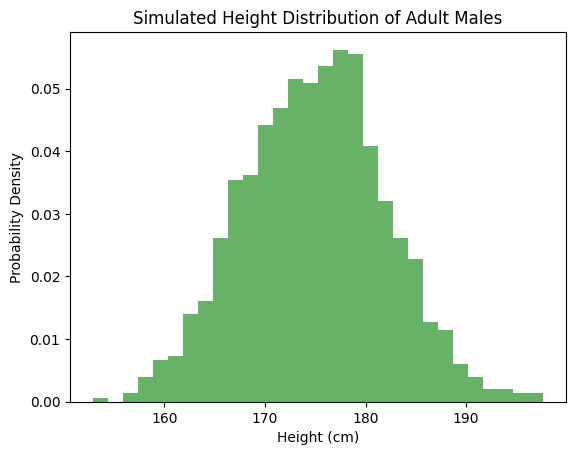

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the distribution: mean and standard deviation
mu, sigma = 175, 7  # For example, mean height = 175 cm, standard deviation = 7 cm

# Generating 1000 samples with normal distribution
heights = np.random.normal(mu, sigma, 1000)

# Plotting the distribution
plt.hist(heights, bins=30, density=True, alpha=0.6, color='g')
plt.title('Simulated Height Distribution of Adult Males')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.show()

#to find the probability that a randomly chosen adult male is between 170 cm and 180 cm tall, 
#we calculate the area under the curve between 170 cm and 180 cm. 

## 1. Uniform distribution
- when the probability of each value of the RV is equal.
- A continuous uniform ditribution is defined by min and max values
- the PDF of uniform ditribution is constant
- example: you are waiting for a bus, which comes in every 30 mins interval. within 30 mins it can come at any time. You reach bus stop and in 30 minutes interval the probability of boarding on a bus is all equal at any time.
- let's simulate the waiting time:

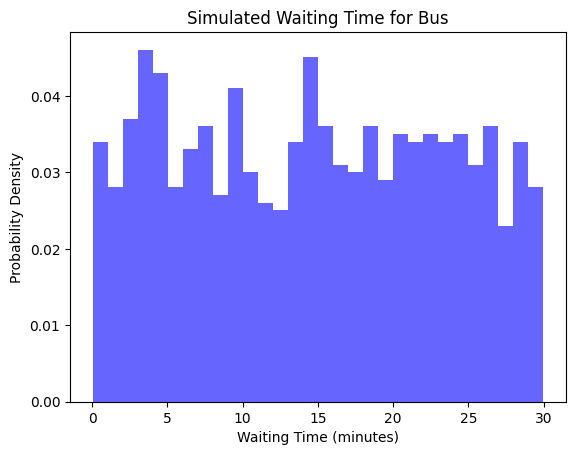

In [52]:
import numpy as np
from matplotlib import pyplot as plt

#defining min and max in minutes
min_time, max_time = 0, 30 

#create 1000 uniform smaples in the range 30
#np.random.uniform generates here given samples from uniform distribution between range given
wait_times = np.random.uniform(min_time, max_time, 1000)

plt.hist(wait_times, bins=30, density=True, alpha=0.6, color='b')
plt.title('Simulated Waiting Time for Bus')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Probability Density')
plt.show()



- The density function for Uniform Distribution in **interavl 0-1** is given as:

In [53]:
import numpy as np
import matplotlib.pyplot as plt

#for all individual x values the probability is 1 between x=0 to 1
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

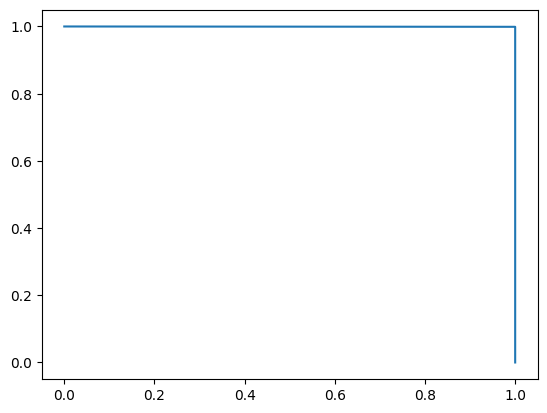

In [54]:
# to plot a proper continuous pdf , first define x_value list, lets say 1000 values between 0 and 1
x_values = np.linspace(0, 1, 1000) #consists 1000 values of x between 0 and 1

#to plot PDF in y-axis for all x_values, define y list for all x using above func defined
y_PDF = [uniform_pdf(i) for i in x_values]

plt.plot(y_PDF,x_values)

Text(0.5, 1.0, 'Probability Distribution Function of Uniform Distribution Over Range [0,1]')

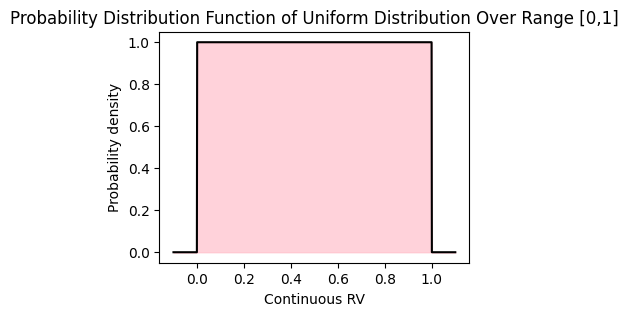

In [56]:
#to make plot better lets increase x axis range from -0.1 to 1.1
x_values = np.linspace(-0.1, 1.1, 1000)

y_PDF = [uniform_pdf(i) for i in x_values]

plt.figure(figsize=(4, 3))

plt.plot(x_values,y_PDF, color = 'black')

#to fill plot with blue color
plt.fill_between(x_values, y_PDF, color = 'pink', alpha = 0.7)

#to customize this plot more
plt.xlabel('Continuous RV')
plt.ylabel('Probability density')
plt.title("Probability Distribution Function of Uniform Distribution Over Range [0,1]")


-  There's no number in this range that is more likely than another.
-  For example, the probability of the variable falling between 0.2 and 0.3 is the same as it falling between 0.7 and 0.8, given that both intervals have the same length.

### Cumulative Distribution of Uniform dustribution in [0,1] range

- Mathematically, the CDF F(x) for a random variable X is defined as: `F(x)=P(X≤x)`

-  In the case of the uniform distribution over the interval 
[a,b], the CDF is given by: F(x)= x−a/ b−a

- for a≤x≤b, and it is equal to 0 for x<a and, 1 for x≥b.


([<matplotlib.axis.YTick at 0x13354b0d0>,
 [Text(0, 0.0, '0.0'), Text(0, 0.5, '0.5'), Text(0, 1.0, '1.0')])

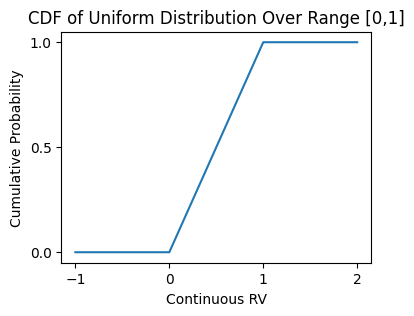

In [58]:
def uniform_cdf(x: float) -> float:
    """Returns the probability that a uniform RV is <=x"""
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

#lets define x_values for plotting CDF
x_values = np.linspace(-1, 2, 1000)  #this range is chosen to plot a nice graph 
y_CDF = [uniform_cdf(i) for i in x_values]

#plot
plt.figure(figsize=(4, 3))
plt.plot(x_values, y_CDF)
plt.xlabel('Continuous RV')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Uniform Distribution Over Range [0,1]')
plt.xticks([-1,0,1,2])
plt.yticks([0, 0.5, 1])



# 6. Normal Distribution/Guassian distribution/bell curve
- classic bell-shaped distribution
- determined by using only 2 parameters: mean and SD
- mean = where the curve is centered
- SD = how wide the curve is
- formula :  $$f(x \mid \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

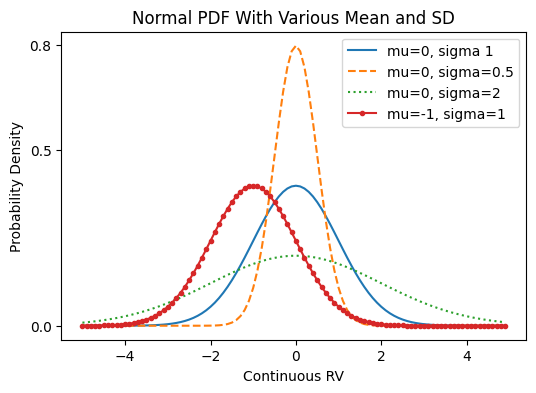

In [60]:
#define normal PDF 

#first, define sqrt(2*pi)
import math
import matplotlib.pyplot as plt
SQRT_TWO_PI = math.sqrt(2 * math.pi)

#x is RV, mu is mean, sigma is SD
def normal_PDF(x: float, mu: float=0, sigma: float=1):
    return (math.exp(-(x-mu)**2 / (2*(sigma**2)))/(sigma*SQRT_TWO_PI))

#lets plot it
x_values = [x/10 for x in range (-50, 50)]  #generate 100 x values in a ramge of -5 to 5
#can also be generated using numpy
# x_values = np.linspace(-5,5,100)

#y_values = [normal_PDF(i,0,1) for i in x_values]
plt.figure(figsize=(6, 4))
plt.plot(x_values,[normal_PDF(i,0,1) for i in x_values], '-', label = 'mu=0, sigma 1')
plt.plot(x_values,[normal_PDF(i,0,0.5) for i in x_values],'--', label = 'mu=0, sigma=0.5')
plt.plot(x_values,[normal_PDF(i,0,2) for i in x_values], ':', label = 'mu=0, sigma=2')
plt.plot(x_values, [normal_PDF(i,-1,1) for i in x_values], '.-', label = 'mu=-1, sigma=1')
plt.legend()
plt.xlabel('Continuous RV')
plt.ylabel('Probability Density')
plt.title('Normal PDF With Various Mean and SD')
plt.yticks([0, 0.5, 0.8])
plt.show()


- mu = 0 and sigma = 1 : **Standard Normal Distribution**
- if Z is a Standard Normal RV
- then RV X with given mu and sigma is given by: `X = sigma*Z + mu`
- so, if we know a normal random distribution, we can find a standard normal distribution.

### CDF for Normal Distribution
- cannot write in a formula way / elementary manner
- Defined using a function in python's math library called error function `erf()`
- $$
F(x \mid \mu, \sigma) = \frac{1}{2} \left[ 1 + \text{erf}\left(\frac{x - \mu}{\sigma \sqrt{2}}\right) \right]$$
$$ erf(x) = \frac{2}{\sqrt\pi} * \int_0^x (e)^(-t^2) dt $$


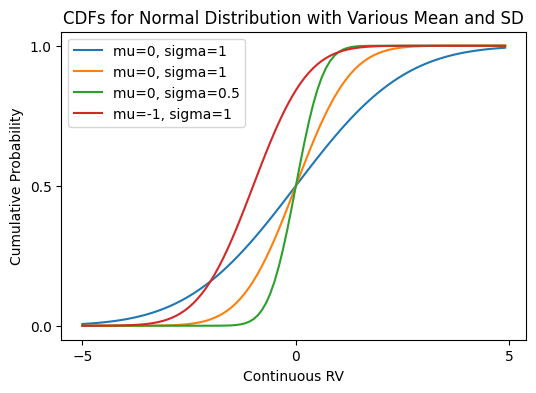

In [61]:
import matplotlib.pyplot as plt
import math

def normal_CDF( x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1+math.erf((x-mu)/(sigma*math.sqrt(2))))/2

#lets plot it
#for -5 to 5 range of 100 values, mu= 0, sigma = 2

x_values = [x/10 for x in range(-50 , 50)]
#x_values = np.linspace(-5,5,100)

plt.figure(figsize=(6,4))

plt.plot(x_values, [normal_CDF(i, sigma = 2) for i in x_values], label = 'mu=0, sigma=1')
plt.plot(x_values, [normal_CDF(i, sigma = 1) for i in x_values], label = 'mu=0, sigma=1')
plt.plot(x_values,[normal_CDF(i, sigma = 0.5) for i in x_values], label = 'mu=0, sigma=0.5')
plt.plot(x_values, [normal_CDF(i, mu= -1) for i in x_values], label = 'mu=-1, sigma=1')
plt.legend(loc = 'upper left')
plt.title('CDFs for Normal Distribution with Various Mean and SD')
plt.yticks([0,0.5,1])
plt.xticks((-5,0,5))
plt.xlabel('Continuous RV')
plt.ylabel('Cumulative Probability')
plt.show()


#### Physical significance of CDF
- Value of CDF at x is the probability of RV to be less than x
- Value of CDF at certain point is the cumulative area of its PDF upto that point.
- CDF value can be thus used to calculate quantile/percentile/Z-values.

### Inverse Normal CDF
- To find the value corresponding to specified probability we need to inverse the CDF. How?
  - we use **binary search** numerical method to find this inverse.
  - what is Binary Search method?
  - in a given range to find the position of a value, we find mid of range, compare it with given value, if value>mid => leave lower half of range from mid and mid becomes new-low and so on...
 - if PDF(X) is not standard distribution(Z) then we know [X = sigma*Z + mu]
   - Z = normal_PDF(z, mu=0, sigma=1)
   - X = normal_PDF(z, mu!=0 or sigma!=1)
   - same for CDF

In [10]:
#p: target probabilty for which x is to be determined
def inverse_normal_cdf(p: float, 
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 1e-5) -> float:
    """find approximate inverse of CDF using binary search"""
    #if PDF X is not standard distribution Z then we know [X = sigma*Z + mu]
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance = tolerance)

    #define range of distribution
    lo_z = -10
    hi_z = 10

    while hi_z - lo_z > tolerance:
        mid_z = (lo_z + hi_z) / 2  #find midpoint
        mid_p = normal_CDF(mid_z)
        if mid_p < p:
            lo_z = mid_z
        else:
            hi_z = mid_z

    return mid_z

z_values = [z/10  for z in range(-50,50)]
# plt.plot(z_values, [normal_CDF(i, 0, 2) for i in z_values])
# plt.show()
print(f'z value wrt probaility 0.7 = {inverse_normal_cdf(0.7, 0, 2)} and z value wrt probaility 1.2 = {inverse_normal_cdf(1.2, 0, 2)}')
print(inverse_normal_cdf(0.95,500,15.8))

z value wrt probaility 0.7 = 1.0487937927246094 and z value wrt probaility 1.2 = 19.999980926513672
525.9886264801025


# 7. The central Limit Theorem

- Key points of CLT

1. Assumptions:
     - RV should be **independent** and **identically distributed** (iid)
       - identically distributed means, in an event space of x={X1, X2, X3, ....}, P(X1<=x)=P(X2<=x) and so on.
     - **Large Sample** - ~30 is considered large sample size


2. Statement:
     - Regardless of shape of original distribution, the distribution of their **mean(or sum)** approaches to **normal distribution**.


3. Mathematical Approach:
     - If X1, X2, ...Xn are iid RV with mean $\mu$, and SD $\sigma$, and n being very large
     - then distribution of sample mean ($\bar{X}$ = (X1+X2+...Xn)/n) approaches a normal distribution with mean = $\mu$, and SD = $\sigma$/$\sqrt{n}$
     - Therefore, from relation Z = X(independent Variable)*$\sigma$ + $\mu$
     - standard distibuted sample becomes(where $\mu$ =0, $\sigma$ =1) : ($\bar{X}$/n - $\mu$) / $\sigma$ = ($\bar{X}$ - n * $\mu$ ) / $\sqrt{n}$*$\sigma$

## Rolling die Example

- Suppose you are rolling a fair six-sided die, and you are interested in the outcomes of two consecutive rolls. Let X1 be the outcome of the first roll, and X2 be the outcome of the second roll.

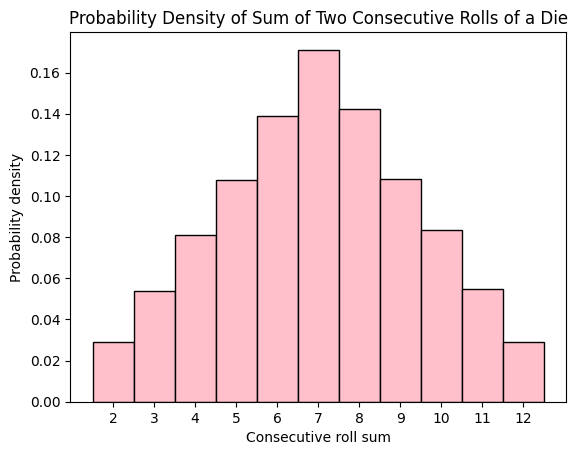

In [106]:
import random
import matplotlib.pyplot as plt
from typing import List

#simulating die-roll
def roll_die() -> int:
    return random.randint(1,6)

#roll the die twice and find their sum
def die_sum(num_rolls: int) -> List:
    sum_sample = [ roll_die() + roll_die() for _ in range(num_rolls)]
    return sum_sample

# die_sum(10)

x_values = die_sum(10000)
#print(x_values)
plt.hist([x for x in x_values],bins= range(2,14),density=True, edgecolor='black',align = 'mid', color='pink')
#how density is calculated: values in bins/sum of all bins values
plt.xlabel('Consecutive roll sum')
plt.ylabel('Probability density')
plt.title('Probability Density of Sum of Two Consecutive Rolls of a Die')
labels = [str(x) for x in range(2,13)]
plt.xticks(ticks=[x+0.5 for x in range(2,13)], labels=labels)
plt.show()


In [62]:
plt.hist?

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

## Bernoulli RV Example

- To understand CLT example on Bernoulli trial and binomial distribution, lets get to know about them first.

**Bernoulli trial**: fundamental concept to understand more complex trials linke binomial distribution. Characterstics of bernoulli trial are:

1. Two Possible Outcomes in each trail - often labeled as "success" and "failure." 
- These outcomes are mutually exclusive.


2. Independent Trials: outcome of one trial does not affect the outcome of any other trial.


3. Fixed Probability of Success and failure:The probability of success (denoted by p) and failure (denoted by 1−p) are constant.


4. Binary Outcomes: can be represented by numeric values like 1 (success) and 0 (failure).


5. Identical Probability Distribution: RVs have the same probability distribution.

**Example of bernoulli trial** 
- The prototypical example of a Bernoulli trial is a single coin flip.
- In this case: Success might be defined as getting a "head" (H).
- Failure might be defined as getting a "tail" (T).
- The probability of success (p) is the probability of getting a head (typically 0.5 for a fair coin).
- Each coin flip is independent of the others, and the probability of getting a head is constant across all flips.


**Binomial RV**: Discrete RV that represent *number of success in n number of bernoulli trails*

- The probability mass function (PMF) of a binomial distribution:

    $\[ P(X = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k} \$]

- \($\binom{n}{k}$\) is the binomial coefficient, representing the number of ways to choose \(k\) successes from \(n\) trials.
- \(p\) is the probability of success on a single trial.
- \(1 - p\) is the probability of failure on a single trial.
- \(k\) is the number of successes.

The mean (expected value) and variance of a binomial distribution:

- $$[ \text{Mean (\(\mu\))} = n \cdot p ]$$
- $$[ \text{Variance (\(\sigma^2\))} = n \cdot p \cdot (1 - p)]$$

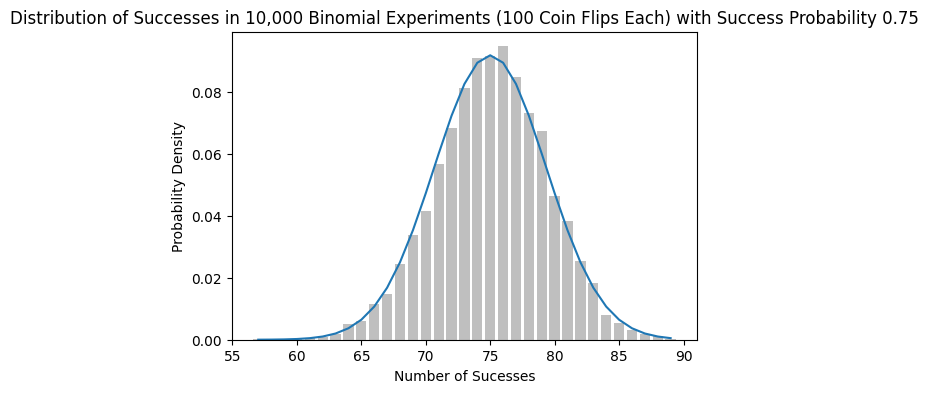

In [110]:
import matplotlib.pyplot as plt
import random
def bernoulli_trial(p: float) -> int:   
    """
    to generate a random sample with specified p
    input: float
    output: int
    """
    return 1 if random.random() <p else 0  
# random.random() returns a random float number between 0 and 1 (excluding 1)


def binomial(p: float, n: int) -> int:
    """ returns the sum of n bernoulli trials"""
    return sum(bernoulli_trial(p) for _ in range(n)) 

#according to central limit theorem the sum/avaerage of any RV distribution tends to normal distribution 
#when sample size is very large
#lets plot and see


from collections import Counter
import math
def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """
    pick binomials of n trials for every num_points and plot histogram
    """
    
    data = [binomial(p,n) for _ in range(num_points)]
    
    # list of binomial sums for num_points number of group events
    data_counts = Counter(data)
    
    plt.figure(figsize=(6,4))
    plt.bar([x for x in data_counts.keys()], [y/num_points for y in data_counts.values()],0.8, color = '0.75')
    
    # Let's plot the line chart with bar plot
    # We know the mean and SD for binomial distribution mu = n*p and SD = sqrt(n*p*(1-p))
    
    mu = n*p
    sigma = math.sqrt(n*p*(1-p))
    x_values = range(min(data), max(data)+1)
    # print(x_values)
    y_values = [normal_CDF(i+0.5, mu, sigma)-normal_CDF(i-0.5, mu, sigma) for i in x_values]
    # y_values=[normal_PDF(i,mu,sigma) for i in x_values]
    plt.plot(x_values, y_values)
    plt.xlabel('Number of Sucesses')
    plt.ylabel('Probability Density')
    plt.title('Distribution of Successes in 10,000 Binomial Experiments (100 Coin Flips Each) with Success Probability 0.75')
    plt.show()
    
binomial_histogram(0.75, 100,10000)    

# 8. scipy.stats -> PDF and CDF functions

- a module in scipy library
- features:
  1. **Probability Distributions**: e.g., normal, binomial, poisson, etc. which can be used for various statistical calculations.
  2. **Descriptive Statistics**: basic descriptive statistics functions such as mean, median, variance, and standard deviation.
  3. **Statistical Tests**: like t-tests, chi-squared tests, and more.
  4. **Random Variables**: Functions for generating random variables from different distributions.
  5. Tools for **Kernel Density Estimation (KDE)**: which can be used for non-parametric estimation of probability density functions.
  6. **Statistical Functions**: A range of statistical functions for moments, skewness, kurtosis, etc.
  7. **Continuous and Discrete Distributions**: Functions for both continuous and discrete probability distributions.

10.0 6.0


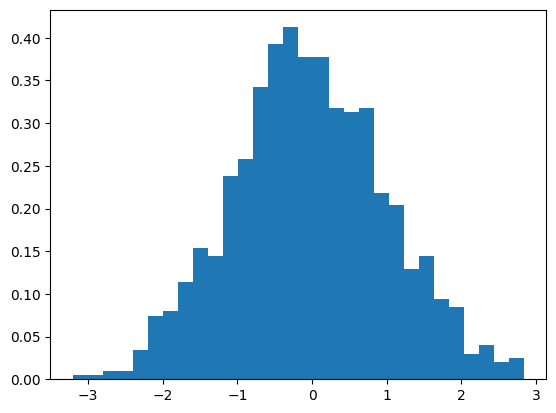

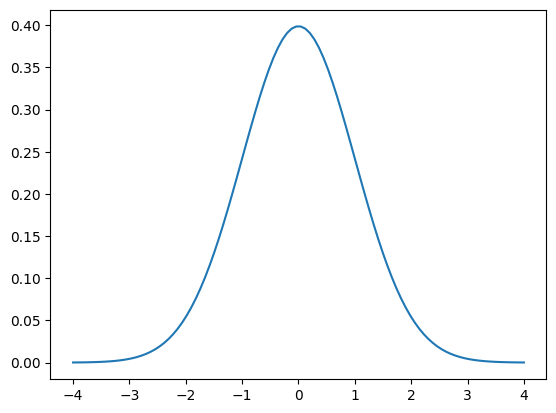

In [74]:
from scipy.stats import norm
import numpy as np

#generate a random sample from a normal distribution
data = norm.rvs(loc=0, scale=1, size=1000) # 'data' is numpy array with 1000 samples
#rvs = random variates
#loc means mean
#scale means SD

#can be used to calculate mean and SD
mean = norm.mean(loc=10, scale=3)
SD = norm.std(loc=9, scale=6)
print(mean, SD)

#lets plot the hist of data generated
plt.hist(data, density=True, bins=30, label ='Random Sample')
plt.show()

#can generate normal PDF using norm class
x_values = np.linspace(-4,4,100)
y_values = norm.pdf(x_values, loc=0, scale=1) #represent standard DF as mean=0, sd=1
plt.plot(x_values,y_values)
plt.show()


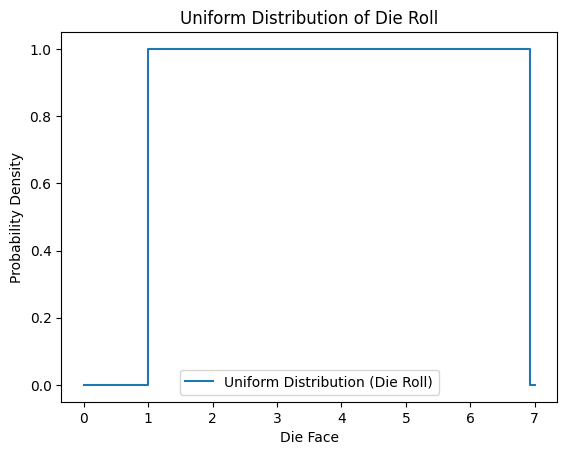

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Parameters
n = 10  # Number of trials
p = 0.5  # Probability of success

# Generate x values
x = np.arange(0, n+1)

# Compute binomial probabilities
pmf = binom.pmf(x, n, p)

# Plot
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution PMF (n={n}, p={p})')
plt.show()

